In [23]:
from db_utils import DataFrameInfo, DataTransform, DataFrameTransform, Plotter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('transformed_loan_payments')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   54231 non-null  int64  
 1   id                           54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                54231 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     54231 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [3]:
out_prncp_zeros = len(df.loc[df['out_prncp'] == float(0.00)])
funding = len(df.loc[df['funded_amount']  > 0])
funding_inv = len(df.loc[df['funded_amount_inv']  > 0])
loans_recovered_against_total_funding = round(out_prncp_zeros / funding * 100, 2)
loans_recovered_against_investor_funding = round(out_prncp_zeros / funding_inv * 100, 2)


print(f'{loans_recovered_against_total_funding}%')
print(f'{loans_recovered_against_investor_funding}%')

62.62%
62.75%


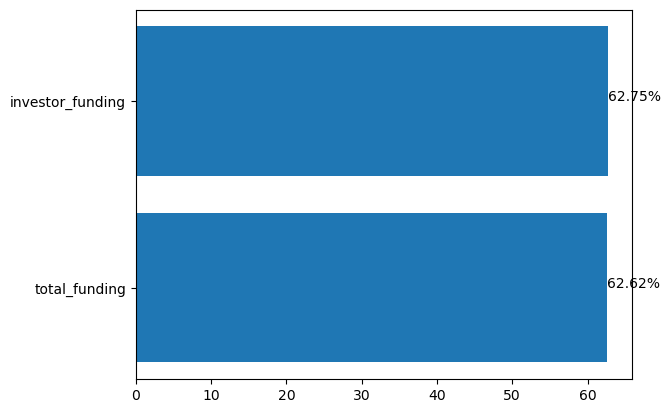

In [4]:
labels = ['total_funding','investor_funding']
recovery_percent = [loans_recovered_against_total_funding, loans_recovered_against_investor_funding]

plt.barh(labels, recovery_percent )
for index, value in enumerate(recovery_percent):
    plt.text(value, index, f'{value}%')

In [5]:
charged_off_loans = len(df.loc[df['loan_status'] == 'Charged Off']) / len(df['loan_status']) * 100
print(f'{round(charged_off_loans, 2)}%')

total_amount_paid_charged_off_loan = (df.loc[df['loan_status'] == 'Charged Off']['total_payment'].sum() / df.loc[df['loan_status'] == 'Charged Off']['loan_amount'].sum()) * 100
print(f'{round(total_amount_paid_charged_off_loan, 2)}%')

10.27%
48.98%


In [6]:
df['term_amount'] = df['term'].str.replace(r'\D', '', regex = True).astype(np.float64)
df['term_amount']

DataTransform(df).convert_to_datetime('last_payment_date')
DataTransform(df).convert_to_datetime('issue_date')
df['months_paid'] = (df["last_payment_date"].dt.year - df["issue_date"].dt.year) * 12 + (df["last_payment_date"].dt.month - df["issue_date"].dt.month)
df['months_left_over'] = df['term_amount'] - df['months_paid'] 

df['revenue lost'] =df.loc[df['loan_status'] == 'Charged Off']['last_payment_amount'] * pow(1+(df.loc[df['loan_status'] == 'Charged Off']['int_rate']/100), (df['months_left_over']/12))
revenue_lost_int = df['revenue lost'].sum()

print(f'${round(revenue_lost_int, 2)}')

df['unpaid loss'] = df.loc[df['loan_status'] == 'Charged Off']['last_payment_amount']*df['months_left_over']
revenue_lost_total = df['unpaid loss'].sum()

print(f'${round(revenue_lost_total, 2)}')

$3141768.36
$64137103.41


In [8]:
late_payments = df[(df['loan_status'] == 'Late (16-30 days)') | (df["loan_status"] == "Late (31-120 days)")].shape[0]
print(f'Number of late payments is {late_payments}')

percent_late = late_payments / len(df['loan_status']) * 100
print(f'{round(percent_late, 2)}% of all payments were late')

df["revenue_lost"] = df["last_payment_amount"]*df["months_left_over"]
revenue_lost = df["revenue_lost"].sum()
print(f"Potential revenue loss if late customers were charged off is £{round(revenue_lost, 2)}")

revenue_lost_total = revenue_lost_total + revenue_lost
print(f"Potential revenue loss if late customers were charged off and current charged off customers is £{round(revenue_lost_total, 2)}")

Number of late payments is 686
1.26% of all payments were late
The potential revenue loss if late customers were charged off is £4541594588.75
The potential revenue loss if late customers were charged off and current charged off customers is £4605731692.16


In [40]:


late = df[(df['loan_status'] == 'Late (16-30 days)') | (df["loan_status"] == "Late (31-120 days)")]
charged_off = df[(df['loan_status'] == 'Charged Off')]

print(f"The Grade which is most common for loan statuses which are late is {Counter(late['grade']).most_common(1)[0][0]} - with over {Counter(late['grade']).most_common(1)[0][1]} instances")
print(f"The Grade which is most common for loan statuses which are charged off is {Counter(charged_off['grade']).most_common(1)[0][0]} - with over {Counter(charged_off['grade']).most_common(1)[0][1]} instances")


print(f"The purpose of the loan which is most common for loan statuses which are late is {Counter(late['purpose']).most_common(1)[0][0]} - with over {Counter(late['purpose']).most_common(1)[0][1]} instances")
print(f"The purpose of the loan which is most common for loan statuses which are charged off is {Counter(charged_off['purpose']).most_common(1)[0][0]} - with over {Counter(charged_off['purpose']).most_common(1)[0][1]} instances")

print(f"Of all loans which are late, the most common home ownership value is {Counter(late['home_ownership']).most_common(1)[0][0]} - with over {Counter(late['home_ownership']).most_common(1)[0][1]} instances")
print(f"Of all loans which are charged off, the most common home ownership value is {Counter(charged_off['home_ownership']).most_common(1)[0][0]} - with over {Counter(charged_off['home_ownership']).most_common(1)[0][1]} instances")

print(f"Of all loans which are late, the most common policy code is {Counter(late['policy_code']).most_common(1)[0][0]} - with over {Counter(late['policy_code']).most_common(1)[0][1]} instances")
print(f"Of all loans which are charged off, the most common policy code is {Counter(charged_off['policy_code']).most_common(1)[0][0]} - with over {Counter(charged_off['policy_code']).most_common(1)[0][1]} instances")


The Grade which is most common for loan statuses which are late is C - with over 186 instances
The Grade which is most common for loan statuses which are charged off is C - with over 1490 instances
The purpose of the loan which is most common for loan statuses which are late is debt_consolidation - with over 431 instances
The purpose of the loan which is most common for loan statuses which are charged off is debt_consolidation - with over 3073 instances
Of all loans which are late, the most common home ownership value is RENT - with over 309 instances
Of all loans which are charged off, the most common home ownership value is RENT - with over 2608 instances
Of all loans which are late, the most common policy code is 1 - with over 686 instances
Of all loans which are charged off, the most common policy code is 1 - with over 5571 instances
